In [126]:
from statsbombpy import sb
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt

In [5]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-12-01T11:42:34.874323,2021-06-13T16:17:31.694,None,2022-12-01T11:42:34.874323
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [10]:
matches = sb.matches(competition_id=43,season_id=106)

In [18]:
matches[(matches['home_team'] == 'Cameroon') | (matches['away_team'] == 'Cameroon')]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
20,3857259,2022-11-28,12:00:00.000,International - FIFA World Cup,2022,Cameroon,Serbia,3,3,available,...,2022-12-21T16:00:51.547177,2,Group Stage,Al Janoub Stadium,Mohamed Abdulla Hassan Mohd,Rigobert Song Bahanag,Dragan Stojković,1.1.0,2,2
37,3857290,2022-11-24,12:00:00.000,International - FIFA World Cup,2022,Switzerland,Cameroon,1,0,available,...,2023-01-04T11:43:14.946152,1,Group Stage,Al Janoub Stadium,Facundo Tello Figueroa,Murat Yakin,Rigobert Song Bahanag,1.1.0,2,2
43,3857280,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Cameroon,Brazil,1,0,available,...,2022-12-21T15:59:31.458819,3,Group Stage,Lusail Stadium,Ismail Elfath,Rigobert Song Bahanag,Adenor Leonardo Bacchi,1.1.0,2,2


In [39]:
ids = [3857290,3857259,3857280]
events = pd.DataFrame()
for i in ids:
    events_x = sb.events(match_id=i)
    events = events.append(events_x)

In [45]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length',
       'pass_no_touch

In [116]:
vpa = events[['team','type','player','location','pass_end_location','pass_recipient','pass_goal_assist','shot_end_location',
                'shot_outcome','shot_statsbomb_xg','shot_type','pass_outcome','pass_assisted_shot_id']]

In [117]:
vpa = vpa[vpa['player']=='Vincent Paté Aboubakar'].reset_index()

In [118]:
vpa['type'].unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Duel', 'Ball Recovery',
       'Clearance', 'Dribble', 'Pressure', 'Dispossessed', 'Shot',
       'Foul Committed', 'Miscontrol', 'Foul Won', 'Bad Behaviour'],
      dtype=object)

In [469]:
vpa_p = vpa[vpa['type']=='Pass']
vpa_p = vpa_p[['location','pass_end_location','pass_goal_assist','pass_outcome','pass_assisted_shot_id']]

vpa_p = pd.concat([vpa_p,vpa_p['location'].apply(pd.Series)],axis=1)
vpa_p.rename({0:'x1',1:'y1'},axis=1,inplace=True)
vpa_p = pd.concat([vpa_p,vpa_p['pass_end_location'].apply(pd.Series)],axis=1)
vpa_p.rename({0:'x2',1:'y2'},axis=1,inplace=True)

vpa_p['pass_goal_assist'] = vpa_p['pass_goal_assist'].fillna(False)
vpa_p['pass_outcome'] = vpa_p['pass_outcome'].fillna('Completed')
vpa_p['pass_assisted_shot_id'] = np.where(vpa_p['pass_assisted_shot_id'].isna(),False,True)

vpa_p = vpa_p.iloc[:,2:]
vpa_p = vpa_p[(vpa_p['x1']>=60) & (vpa_p['x2']>=60)]

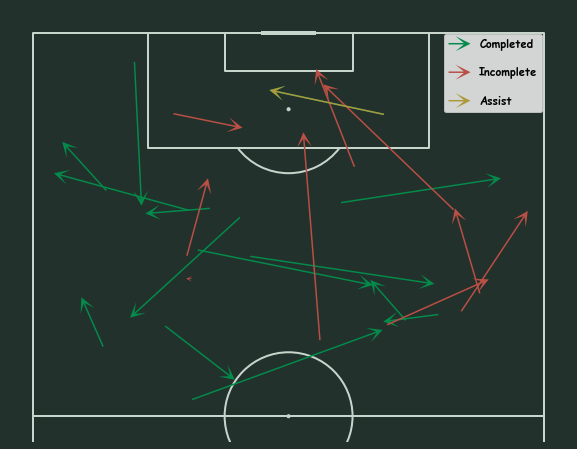

In [483]:
fig, ax = plt.subplots(figsize=(13.5,8))
pitch = VerticalPitch(pitch_type='statsbomb',
             pitch_color='#22312b', line_color='#c7d5cc', figsize=(16,11),
             constrained_layout=True, tight_layout=False, half=True)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)


pitch.arrows(vpa_p[vpa_p['pass_outcome']=='Completed']['x1'],vpa_p[vpa_p['pass_outcome']=='Completed']['y1'],
             vpa_p[vpa_p['pass_outcome']=='Completed']['x2'],vpa_p[vpa_p['pass_outcome']=='Completed']['y2'],
             ax=ax,width=1.5,headwidth=10,
            headlength=10,color='#048a4b',label='Completed')

pitch.arrows(vpa_p[vpa_p['pass_outcome']=='Incomplete']['x1'],vpa_p[vpa_p['pass_outcome']=='Incomplete']['y1'],
             vpa_p[vpa_p['pass_outcome']=='Incomplete']['x2'],vpa_p[vpa_p['pass_outcome']=='Incomplete']['y2'],
             ax=ax,width=1.5,headwidth=10,
            headlength=10,color='#ba4f45',label='Incomplete')

pitch.arrows(vpa_p[vpa_p['pass_goal_assist']==True]['x1'],vpa_p[vpa_p['pass_goal_assist']==True]['y1'],
             vpa_p[vpa_p['pass_goal_assist']==True]['x2'],vpa_p[vpa_p['pass_goal_assist']==True]['y2'],
             ax=ax,width=1.5,headwidth=10,
            headlength=10,color='#ad993c',label='Assist')

#ax.legend(facecolor='#22312b', handlelength=1.5, edgecolor='None', loc=(0.033,0.81), labelcolor='white',
         #prop={'family':'Comic Sans MS','weight':'bold','size':12})

ax.legend(bbox_to_anchor=(0.96,0.95),labelspacing=1.5,prop={'size':11, 'family':'Comic Sans MS','weight':'bold'})

plt.show()

In [390]:
vpa_s = vpa[vpa['type']=='Shot']
vpa_s = vpa_s[['location','shot_outcome','shot_statsbomb_xg']]
vpa_s = pd.concat([vpa_s,vpa_s['location'].apply(pd.Series)],axis=1)
vpa_s.rename({0:'x',1:'y'},axis=1,inplace=True)

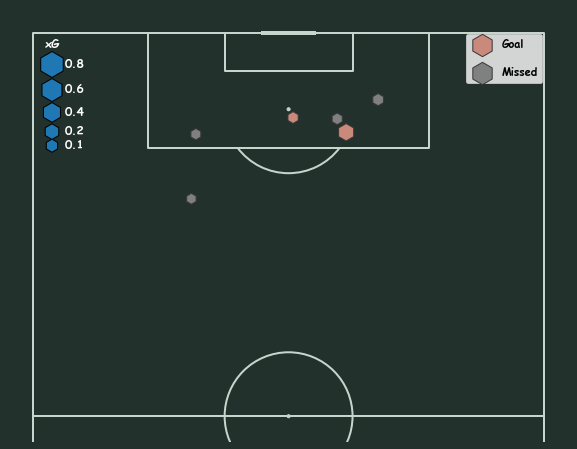

In [460]:
fig, ax = plt.subplots(figsize=(13.5,8))

pitch = VerticalPitch(pitch_type='statsbomb', half=True, 
             pitch_color='#22312b', line_color='#c7d5cc', figsize=(16,11),
             constrained_layout=True, tight_layout=False)

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)

pitch.scatter(vpa_s[vpa_s['shot_outcome']=='Goal']['x'],vpa_s[vpa_s['shot_outcome']=='Goal']['y'],
              s=(vpa_s[vpa_s['shot_outcome']=='Goal']['shot_statsbomb_xg']*720)+100,c='#c9897b',marker='h',ax=ax,label='Goal',
              edgecolors='#383838')

pitch.scatter(vpa_s[vpa_s['shot_outcome']!='Goal']['x'],vpa_s[vpa_s['shot_outcome']!='Goal']['y'],
              s=(vpa_s[vpa_s['shot_outcome']!='Goal']['shot_statsbomb_xg']*720)+100,c='#808080',marker='h',ax=ax,label='Missed',
              edgecolors='#383838')

# legends

legend = ax.legend(bbox_to_anchor=(0.96,0.95),labelspacing=1.5,prop={'size':11, 'family':'Comic Sans MS','weight':'bold'})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]

mSize = [0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]

mx = [3,3,3,3,3]
my = [102.3,104.5,107.5,111,115]
plt.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h')
for i in range(len(mx)):
    plt.text(mx[i]+3.5,my[i],mSize[i],fontsize=12,c='white',ha='center',va='center',fontweight='bold',fontfamily='Comic Sans MS')
    
plt.figtext(0.262,0.810,'xG',fontweight='bold',fontsize=12,color='white',fontfamily='Comic Sans MS')

plt.show()

In [424]:
vpa_l = vpa['location'].apply(pd.Series)
vpa_l.dropna(inplace=True)
vpa_l.rename({0:'x',1:'y'},axis=1,inplace=True)
vpa_l = vpa_l[vpa_l['x']>=60]

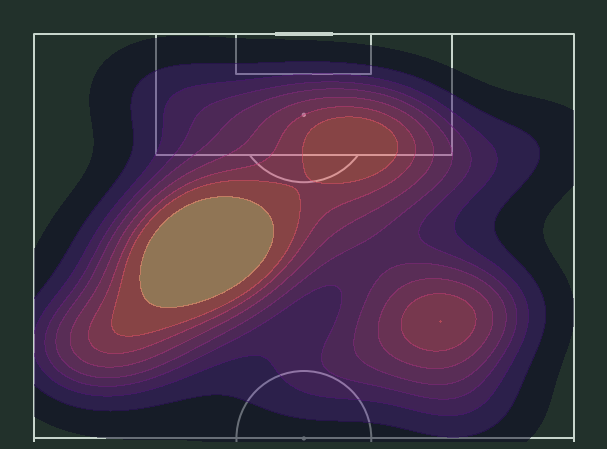

In [485]:
fig, ax = plt.subplots(figsize=(13.5,8))
pitch = VerticalPitch(pitch_type='statsbomb', half=True, 
             pitch_color='#22312b', line_color='#c7d5cc', figsize=(16,11),
             constrained_layout=True, tight_layout=False, pad_bottom=0.5)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)

pitch.kdeplot(x=vpa_l['x'], y=vpa_l['y'], shade=True, shade_lowest=False, ax=ax, fill=True, cmap='magma', alpha=0.5,
           n_levels=10)
plt.show()

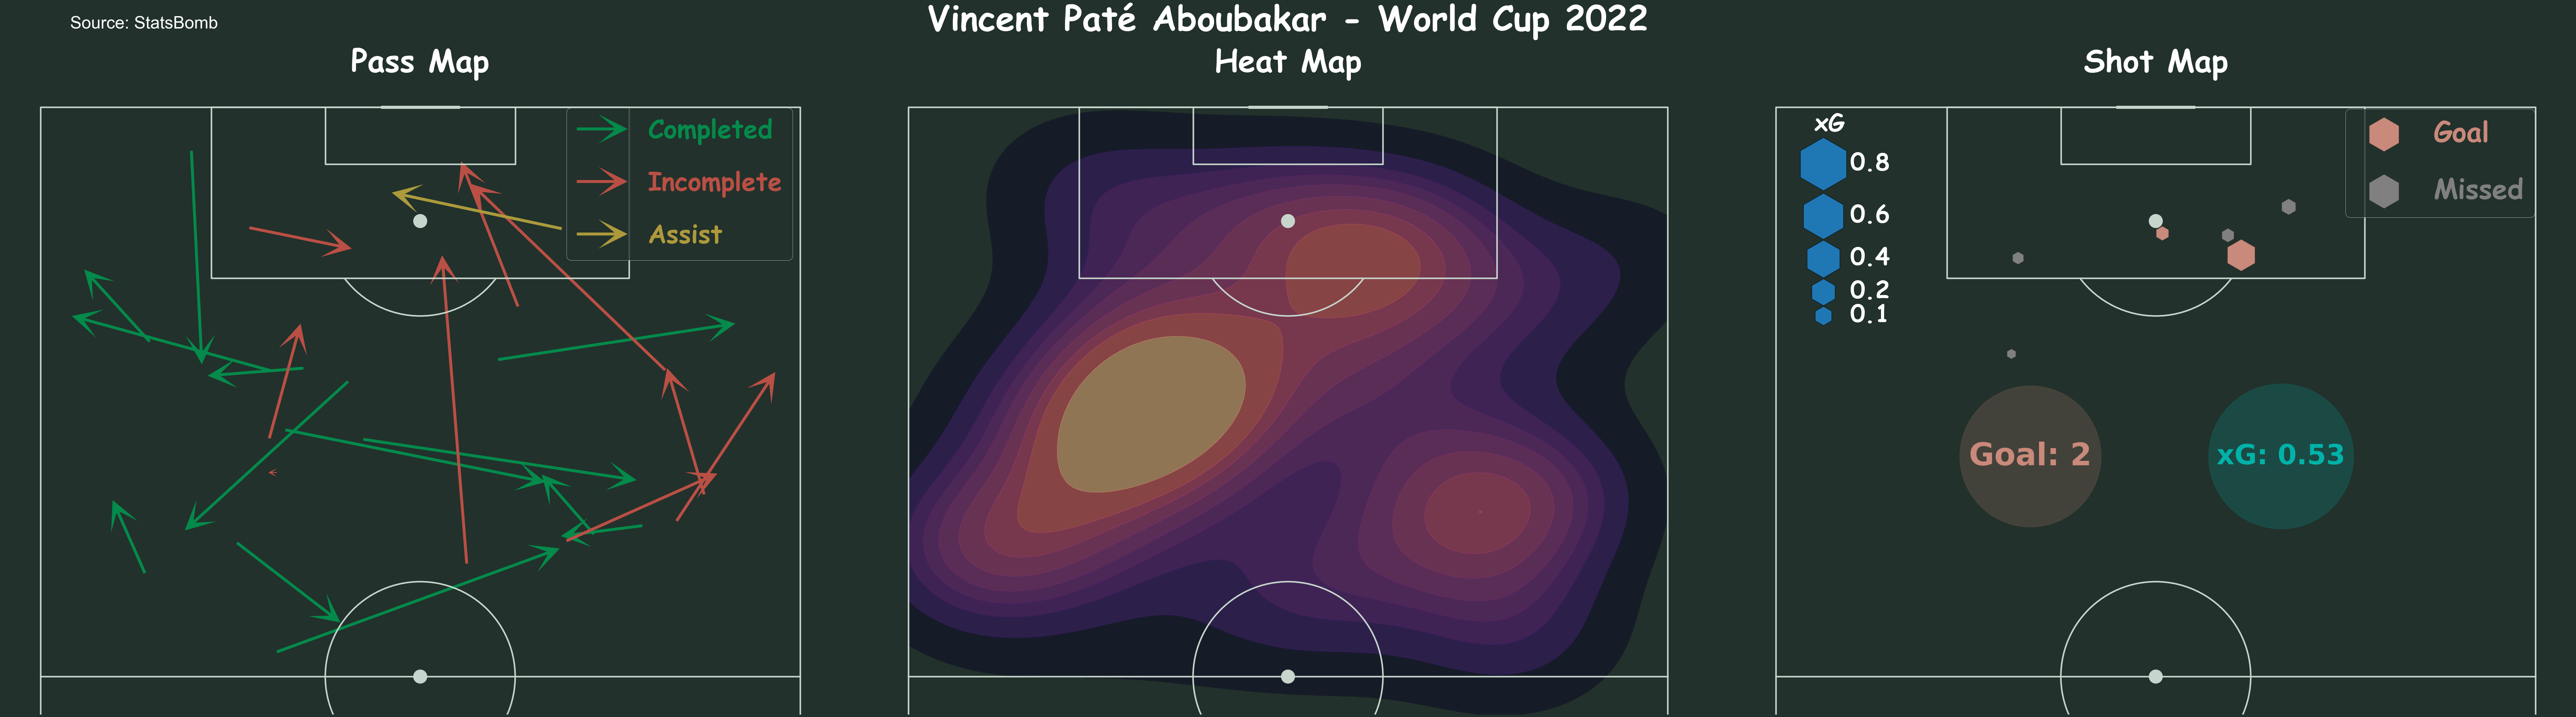

In [709]:
#set your mplsoccer pitch characteristics
pitch = VerticalPitch(pitch_type='statsbomb', figsize = (8,7),
                  pitch_color='#22312b', line_color='#c7d5cc',half = True,
                  constrained_layout=True, tight_layout=True, line_zorder=1, linewidth=4.5, spot_scale=0.006)

fig, ax = pitch.grid(nrows=1, ncols=3, figheight=30,
                      endnote_height=0.0, endnote_space=0,
                      axis=False,
                      title_height=0.03, grid_height=0.87, space=0.1)

fig.set_facecolor('#22312b')

pitch.arrows(vpa_p[vpa_p['pass_outcome']=='Completed']['x1'],vpa_p[vpa_p['pass_outcome']=='Completed']['y1'],
             vpa_p[vpa_p['pass_outcome']=='Completed']['x2'],vpa_p[vpa_p['pass_outcome']=='Completed']['y2'],
             ax=ax['pitch'][0],width=8.5,headwidth=10,
            headlength=10,color='#048a4b',label='Completed')

pitch.arrows(vpa_p[vpa_p['pass_outcome']=='Incomplete']['x1'],vpa_p[vpa_p['pass_outcome']=='Incomplete']['y1'],
             vpa_p[vpa_p['pass_outcome']=='Incomplete']['x2'],vpa_p[vpa_p['pass_outcome']=='Incomplete']['y2'],
             ax=ax['pitch'][0],width=8.5,headwidth=10,
            headlength=10,color='#ba4f45',label='Incomplete')

pitch.arrows(vpa_p[vpa_p['pass_goal_assist']==True]['x1'],vpa_p[vpa_p['pass_goal_assist']==True]['y1'],
             vpa_p[vpa_p['pass_goal_assist']==True]['x2'],vpa_p[vpa_p['pass_goal_assist']==True]['y2'],
             ax=ax['pitch'][0],width=8.5,headwidth=10,
            headlength=10,color='#ad993c',label='Assist')

ax['pitch'][0].legend(bbox_to_anchor=(0.66,0.96),labelspacing=1,prop={'size':74, 'family':'Comic Sans MS','weight':'bold'},facecolor='#22312b',labelcolor='linecolor')
ax['pitch'][0].set_title('Pass Map', fontsize=90, color="white",
                  fontfamily = "Comic Sans MS", fontweight = "bold", va="center", ha="center", pad=15)

pitch.kdeplot(x=vpa_l['x'], y=vpa_l['y'], shade=True, shade_lowest=False, ax=ax['pitch'][1], fill=True, cmap='magma', alpha=0.5,
           n_levels=10)

ax['pitch'][1].set_title('Heat Map', fontsize=90, color="white",
                  fontfamily = "Comic Sans MS", fontweight = "bold", va="center", ha="center", pad=15)

pitch.scatter(vpa_s[vpa_s['shot_outcome']=='Goal']['x'],vpa_s[vpa_s['shot_outcome']=='Goal']['y'],
              s=(vpa_s[vpa_s['shot_outcome']=='Goal']['shot_statsbomb_xg']*30000)+100,c='#c9897b',marker='h',ax=ax['pitch'][2],label='Goal',
              edgecolors='#383838')

pitch.scatter(vpa_s[vpa_s['shot_outcome']!='Goal']['x'],vpa_s[vpa_s['shot_outcome']!='Goal']['y'],
              s=(vpa_s[vpa_s['shot_outcome']!='Goal']['shot_statsbomb_xg']*30000)+100,c='#808080',marker='h',ax=ax['pitch'][2],label='Missed',
              edgecolors='#383838')

legend = ax['pitch'][2].legend(bbox_to_anchor=(0.97,0.96),labelspacing=1,prop={'size':80, 'family':'Comic Sans MS','weight':'bold'},facecolor='#22312b', labelcolor=['#c9897b','#808080'])
legend.legendHandles[0]._sizes = [10000]
legend.legendHandles[1]._sizes = [10000]

mSize = [0.10,0.2,0.4,0.6,0.8]
mSizeS = [30000 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]

mx = [98,100.5,104,108.5,114]
my = [5,5,5,5,5]
pitch.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h',ax=ax['pitch'][2])
for i in range(len(my)):
    ax['pitch'][2].text(my[i]+4.9,mx[i],mSize[i],fontsize=70,c='white',ha='center',va='center',fontweight='bold',fontfamily='Comic Sans MS')
    
ax['pitch'][2].text(4,117.5,'xG',fontweight='bold',fontsize=70,color='white',fontfamily='Comic Sans MS')

goal = len(vpa_s[vpa_s['shot_outcome']=='Goal'])
xg = round(vpa_s['shot_statsbomb_xg'].sum(),2)

ax['pitch'][2].text(0.35,0.4, 'Goal: {}'.format(goal),size=90,
        ha='center',va='center',transform=ax['pitch'][2].transAxes,
        color='#c9897b',fontweight='bold',
        bbox=dict(boxstyle='circle',color='#c9897b',alpha=0.20)
        )

ax['pitch'][2].text(0.65,0.4, 'xG: {}'.format(xg),size=80,
        ha='center',va='center',transform=ax['pitch'][2].transAxes,
        color='#00B2A9',fontweight='bold',
        bbox=dict(boxstyle='circle',color='#00B2A9',alpha=0.20)
        )

ax['pitch'][2].set_title('Shot Map', fontsize=90, color="white",
                  fontfamily = "Comic Sans MS", fontweight = "bold", va="center", ha="center", pad=15)

fig.suptitle("Vincent Paté Aboubakar - World Cup 2022",fontsize=100, color="white",
            fontfamily = "Comic Sans MS", fontweight = "bold", va='center',ha='center')

fig.text(0.05,0.97,'Source: StatsBomb',fontsize=50, color="white",
            fontfamily = "Arial")

plt.show()